Импорт 1.1

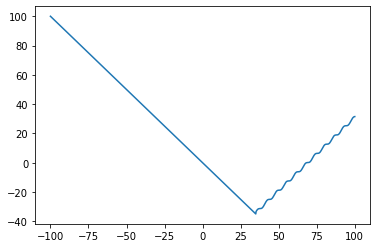

/home/easyhacks/Документы/git/Optimization-Methods-IFMO/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/easyhacks/Документы/git/Optimization-Methods-IFMO/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


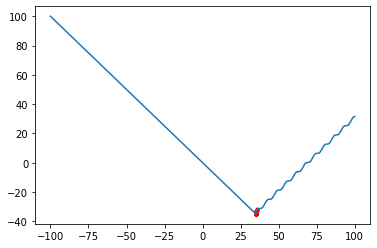

[34.92211863] [-34.92211863]
{'gradient_call_count': 1000, 'function_call_count': 1000}


In [429]:
%run 1.1.ipynb

In [430]:
import numpy as np
import random
import matplotlib.pyplot as plt

Вводим `phi` -- пропорция золотого сечения

In [431]:
phi = (np.sqrt(5) + 1) / 2
print(phi)

1.618033988749895


Реализуем метод золотого сечения.
---

0. Берем отрезок [a, b]
1. Ставим на нем две точки `x1` и `x2` в пропорции золотого сечения.
    $x_1 = b - {b - a \over \phi}$
    $x_2 = a + {b - a \over \phi}$
2. Считаем значения в этих точках
    $y_1 = f(x_1)$
    $y_2 = f(x_2)$
3. Проверяем, если $|y_1 - y_2| < \varepsilon$, значит мы достаточно близко к ответу (с точностью $\varepsilon$). Здачит, завершаем программу.
4. Сдвигаем границы
    Если $y_1 \leq y_2 \Rightarrow b = x_2, x_2 = x_1, x_1 = b - {b - a \over \phi}, y_2 = y_1, y_1 = f(x_1)$
    Если $y_2 \leq y_1 \Rightarrow a = x_1, x_1 = x_2, x_2 = a + {b - a \over \phi}, y_1 = y_2, y_2 = f(x_2)$
5. Возвращаемся к пункту `3`

In [432]:
eps = 1e-5

def find_golden_ratio_point(a, b):
    return b - (b - a) / phi, a + (b - a) / phi

# noinspection PyUnresolvedReferences
def golden_ratio_method(a, b):
    x1, x2 = find_golden_ratio_point(a, b)

    y1 = f(x1)
    y2 = f(x2)

    while np.abs(b - a) > eps:
        if y1 < y2:
            b = x2

            x2 = x1
            x1 = find_golden_ratio_point(a, b)[0]

            y2 = y1
            y1 = f(x1)
        else:
            a = x1

            x1 = x2
            x2 = find_golden_ratio_point(a, b)[1]

            y1 = y2
            y2 = f(x2)

    if y1 < y2:
        return x1, y1
    else:
        return x2, y2

In [433]:
x, y = golden_ratio_method(np.array([-100], dtype=np.float64), np.array([100], dtype=np.float64))
print(x, y)

[34.99999864] [-34.99999864]


Реализуем градиентный спуск с использованием метода золотого сечения
---

TODO

In [434]:
# noinspection PyUnresolvedReferences
def gradient_descent_with_golden_ratio(lr=0.1, iterations=1000, scale=100, check_batch=50, eps=1e-5):
    meta = {
        "gradient_call_count": 0,
        "function_call_count": 0
    }

    points = np.array([], dtype=np.float64).reshape(0, 2)

    coord = np.random.rand(dim) * random.randint(-scale, scale)

    for i in range(iterations):
        points = np.append(
            points,
            np.array([coord, f(coord)], dtype=np.float64).reshape(1, 2),
            axis=0
        )

        meta["function_call_count"] += 1

        avg_changes = np.average(np.abs(np.average(points[-check_batch:-1, 1]) - points[-check_batch:-1, 1]))
        if points.shape[0] > check_batch and avg_changes < eps:
            break

        vectorize = np.vectorize(golden_ratio_method)
        coord, _ = vectorize(coord, coord - scale * lr * gradient(coord))

        meta["gradient_call_count"] += 1

    plt.plot(points[:, 0], points[:, 1], 'r.')
    plt.plot(xs, ys)
    plt.show()

    return (coord, f(coord)), meta

/home/easyhacks/Документы/git/Optimization-Methods-IFMO/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/easyhacks/Документы/git/Optimization-Methods-IFMO/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


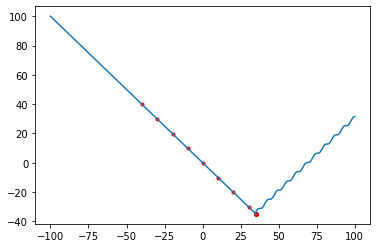

((array([34.99998657]), array([-34.99998657])),
 {'gradient_call_count': 57, 'function_call_count': 58})

In [435]:
gradient_descent_with_golden_ratio()

TODO: compare
---